In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

# Directory where the CSV file is stored
freq = 100
data_dir = "4_18_24-OP"
csv_filename = f"{freq}kHz_R1000_PT10_D15.csv"

# Construct the full path
file_path = os.path.join(data_dir, csv_filename)

# Check if the file exists
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found: {file_path}")

# Load the CSV file
data = pd.read_csv(file_path)

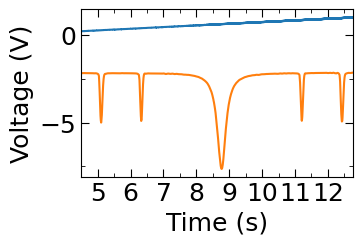

In [2]:
# Assign descriptive column names
data.columns = ["Time", "Field Voltage", "Absorption Voltage"]

# Plot the data
fig, ax = plt.subplots(figsize=(3.5, 3.5/1.612))
ax.plot(data["Time"], data["Field Voltage"], label="Field Voltage")
ax.plot(data["Time"], data["Absorption Voltage"], label="Absorption Voltage")
ax.set_xlim(4.5, 12.75)
ax.set_xlabel("Time (s)", fontsize=18)
ax.set_ylabel("Voltage (V)", fontsize=18)

# Set tick properties
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax.xaxis.set_minor_locator(AutoMinorLocator(2))  # intermediary ticks
ax.yaxis.set_minor_locator(AutoMinorLocator(2))  # intermediary ticks
ax.tick_params(axis='both', which='major', labelsize=18, direction='in', length=6)
ax.tick_params(axis='both', which='minor', labelsize=18, direction='in', length=3)

# Ensuring x ticks on all borders and ticks are inside
ax.tick_params(axis='x', which='both', top=True, bottom=True, labeltop=False, labelbottom=True, direction='in')
ax.tick_params(axis='y', which='both', left=True, right=True, labelleft=True, labelright=False, direction='in')

# Turn on all four borders
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

# No grid and no title
ax.grid(False)
ax.set_title('')

# Legend configuration
# ax.legend(fontsize=12, loc='best')

# Ensure the figures directory exists
figures_dir = os.path.join(data_dir, "figures")
if not os.path.exists(figures_dir):
    os.makedirs(figures_dir)  # Create the directory if it doesn't exist

# Save the plot as an image with 300 dpi in the figures directory
output_filename = f"{freq}kHz_low_field_data_plot.png"
output_path = os.path.join(figures_dir, output_filename)
fig.savefig(output_path, bbox_inches='tight', dpi=300)

plt.show()
